Step 1: Loading data
Step 2: Selecting features
Step 3: Splitting data
Step 4: Training models
Training random_forest
Training knn
Training logistic_regression
Training naive_bayes
Training svm
Step 5: Evaluating models
Step 6: Visualizing ROC curves


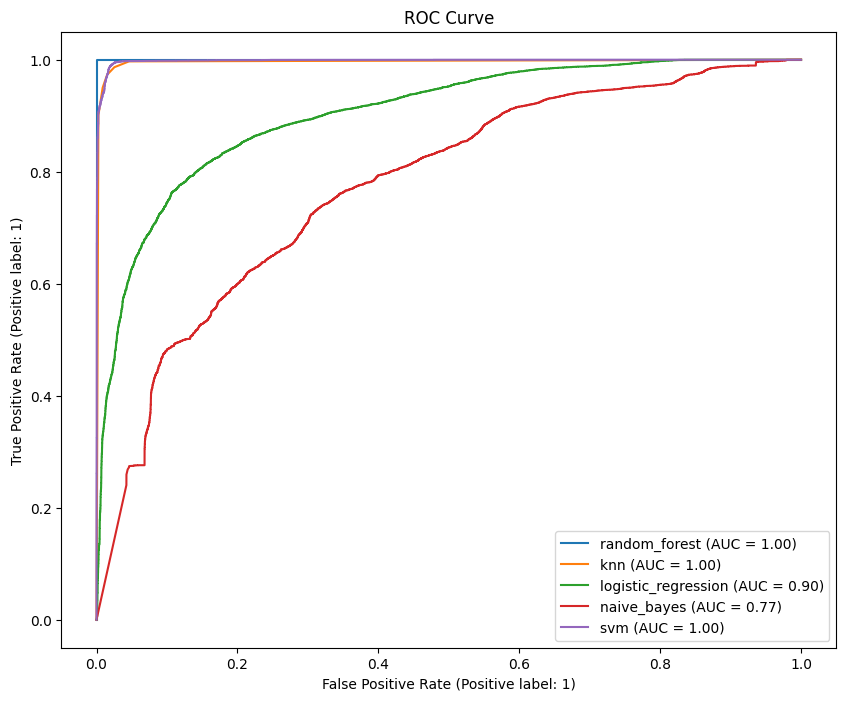

Step 7: Model Comparison
Model: random_forest
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12613
           1       1.00      1.00      1.00      8155

    accuracy                           1.00     20768
   macro avg       1.00      1.00      1.00     20768
weighted avg       1.00      1.00      1.00     20768

ROC AUC Score: 1.00
Mean Squared Error: 0.00
Confusion Matrix:
[[12613     0]
 [    0  8155]]

Model: knn
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12613
           1       0.98      0.97      0.97      8155

    accuracy                           0.98     20768
   macro avg       0.98      0.98      0.98     20768
weighted avg       0.98      0.98      0.98     20768

ROC AUC Score: 1.00
Mean Squared Error: 0.02
Confusion Matrix:
[[12423   190]
 [  219  7936]]

Model: logistic_regress

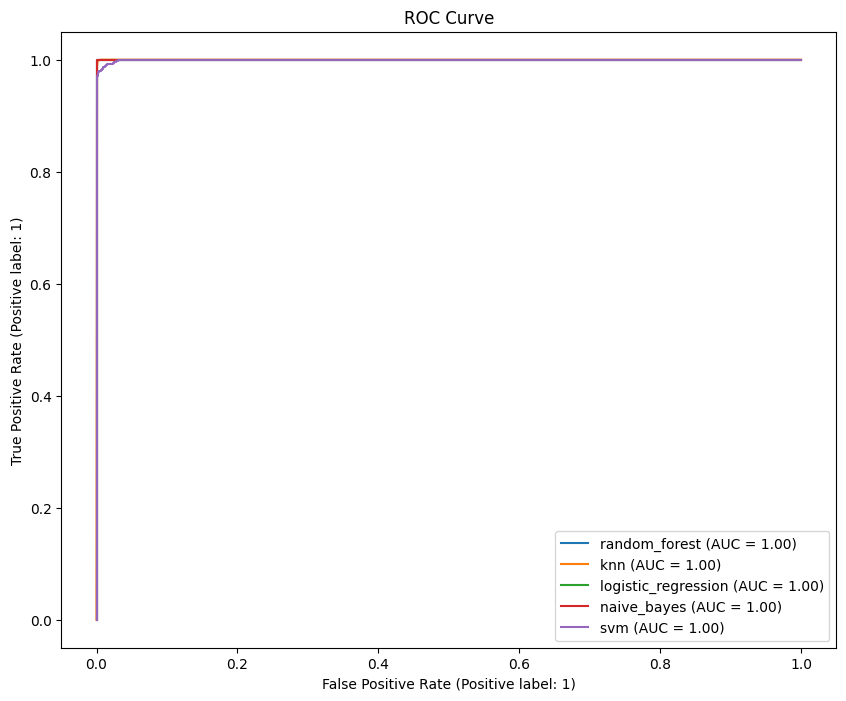

Performing PCA and KMeans clustering


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


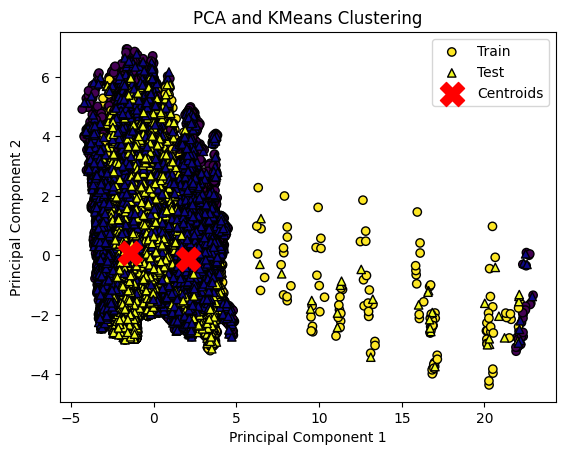

Training models using PCA components


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM PCA Accuracy: 0.55
RandomForest PCA Accuracy: 0.83
Training LinearSVC model using PCA components...
Accuracy Score for LinearSVC with PCA: 0.5518104776579353
              precision    recall  f1-score   support

           0       0.60      0.78      0.68     12613
           1       0.37      0.20      0.26      8155

    accuracy                           0.55     20768
   macro avg       0.48      0.49      0.47     20768
weighted avg       0.51      0.55      0.51     20768



/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


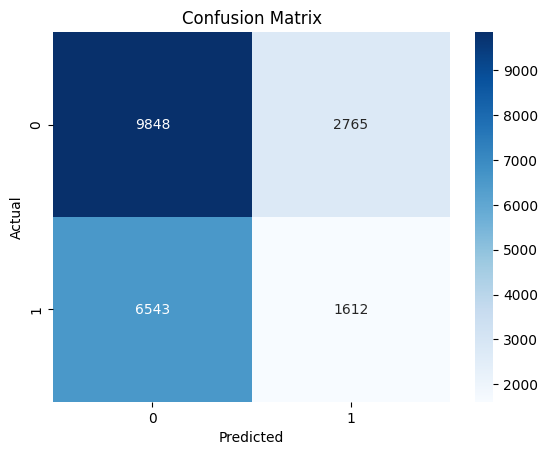

Training RandomForestClassifier model using PCA components...
Accuracy Score for RandomForestClassifier with PCA: 0.8327234206471494
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     12613
           1       0.78      0.79      0.79      8155

    accuracy                           0.83     20768
   macro avg       0.82      0.83      0.83     20768
weighted avg       0.83      0.83      0.83     20768



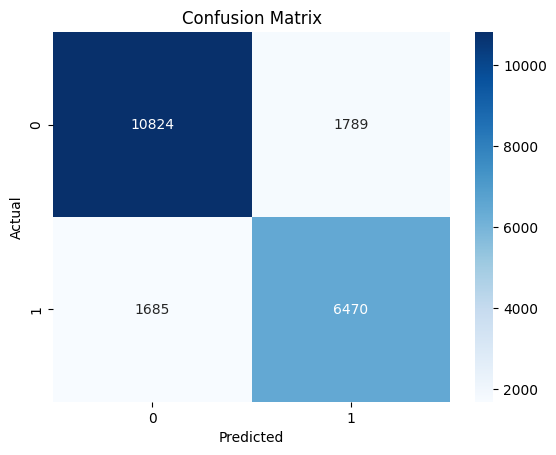

Training KMeans clustering model...


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Predicted clusters: [2 0 1 ... 1 1 1]


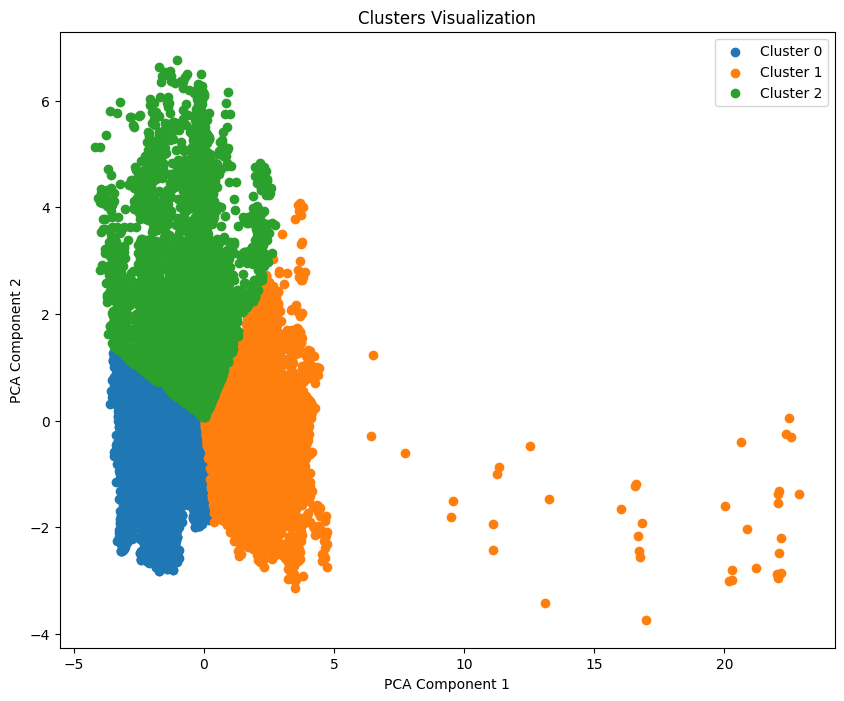

Training neural network model using PCA components...
649/649 [==============================] - 0s 607us/step - loss: 0.3769 - accuracy: 0.8127
Neural Network Accuracy: 0.81


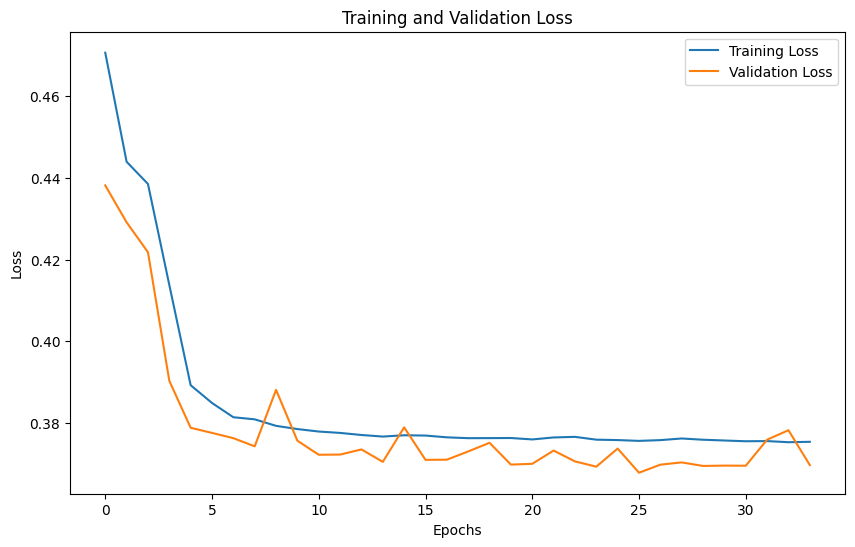

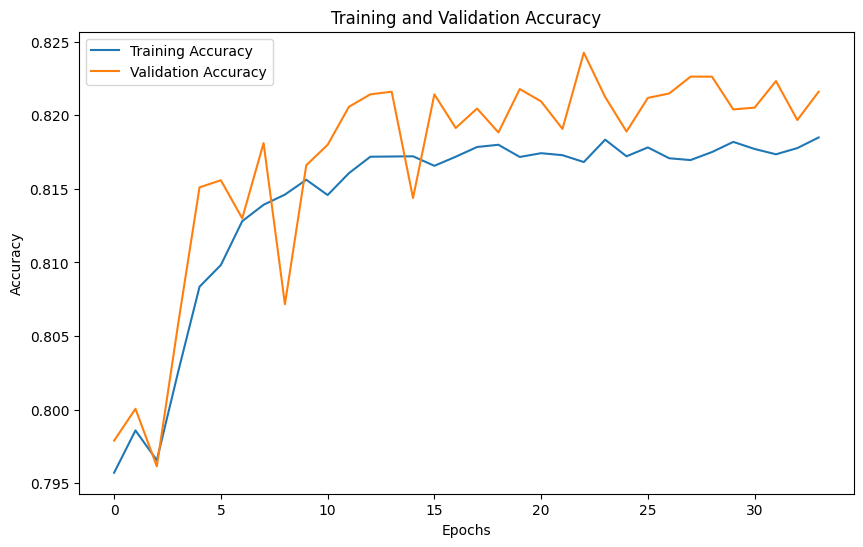

649/649 [==============================] - 0s 360us/step
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     12613
           1       0.74      0.80      0.77      8155

    accuracy                           0.81     20768
   macro avg       0.80      0.81      0.81     20768
weighted avg       0.82      0.81      0.81     20768



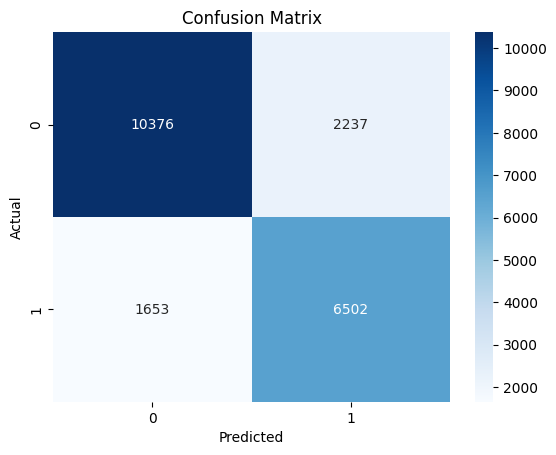

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, confusion_matrix, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
import tensorflow as tf
from tensorflow import keras

# Step 1: Load and preprocess data
def load_data(file_path):
    return pd.read_csv(file_path).dropna()

# Step 2: Feature engineering and selection
def select_features(df, feature_list):
    features = df[feature_list]  # Selecting specific features
    labels = df['label_x']
    return features, labels

# Step 3: Train-test split
def split_data(features, labels, test_size=0.2, random_state=42):
    return train_test_split(features, labels, test_size=test_size, random_state=random_state)

# Step 4: Model training
def train_model(X_train, y_train, model_type='random_forest', random_state=42):
    if model_type == 'random_forest':
        model = RandomForestClassifier(n_estimators=100, random_state=random_state)
    elif model_type == 'knn':
        model = KNeighborsClassifier(n_neighbors=5)
    elif model_type == 'logistic_regression':
        model = LogisticRegression(max_iter=1000, random_state=random_state)
    elif model_type == 'naive_bayes':
        model = GaussianNB()
    elif model_type == 'svm':
        model = make_pipeline(StandardScaler(), SVC(probability=True, random_state=random_state))
    else:
        raise ValueError("Invalid model type.")
    model.fit(X_train, y_train)
    return model

# Step 5: Model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    confusion = confusion_matrix(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return accuracy, report, roc_auc, confusion, mse

# Step 6: Visualization - ROC Curve
def visualize_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for name, model in models.items():
        RocCurveDisplay.from_estimator(model, X_test, y_test, ax=plt.gca(), name=name)
    plt.title('ROC Curve')
    plt.show()

# Plotting confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def main():
    # Step 1: Load and preprocess data
    print("Step 1: Loading data")
    df = load_data("dataset_sdn.csv")

    # Specify the features to be used for training
    selected_features = [
        'dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 
        'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 
        'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps'
    ]

    # Step 2: Feature engineering and selection
    print("Step 2: Selecting features")
    features, labels = select_features(df, selected_features)

    # One-hot encode categorical features
    categorical_features = features.select_dtypes(include=['object']).columns
    numeric_features = features.select_dtypes(exclude=['object']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )

    features = preprocessor.fit_transform(features)

    # Step 3: Train-test split
    print("Step 3: Splitting data")
    X_train, X_test, y_train, y_test = split_data(features, labels)

    # Step 4: Model training
    print("Step 4: Training models")
    models = {}
    for model_type in ['random_forest', 'knn', 'logistic_regression', 'naive_bayes', 'svm']:
        print(f"Training {model_type}")
        model = train_model(X_train, y_train, model_type)
        models[model_type] = model

    # Step 5: Model evaluation
    print("Step 5: Evaluating models")
    results = {}
    for name, model in models.items():
        accuracy, report, roc_auc, confusion, mse = evaluate_model(model, X_test, y_test)
        results[name] = {'accuracy': accuracy, 'report': report, 'roc_auc': roc_auc, 'confusion': confusion, 'mse': mse}

    # Step 6: Visualization - ROC Curve
    print("Step 6: Visualizing ROC curves")
    visualize_roc_curve(models, X_test, y_test)

    # Step 7: Model comparison
    print("Step 7: Model Comparison")
    for name, result in results.items():
        print(f"Model: {name}")
        print(f"Accuracy: {result['accuracy']:.2f}")
        print("Classification Report:")
        print(result['report'])
        print(f"ROC AUC Score: {result['roc_auc']:.2f}")
        print(f"Mean Squared Error: {result['mse']:.2f}")
        print("Confusion Matrix:")
        print(result['confusion'])
        print()

    # Step 8: Analyzing the importance of the target column
    print("Step 8: Analyzing target column")
    target_importance = df['label_x'].value_counts(normalize=True)
    print("Importance of the target column (label):")
    print(target_importance)
    
    # Load additional datasets
    print("Loading additional datasets")
    df_1 = pd.read_csv("Finalv1.csv").dropna()
    df_2 = pd.read_csv("Finalv2.csv").dropna()
    df3 = pd.merge(df_2, df_1, on="No.").dropna()
    print(df3)

    feature_set2 = [
        'Time_x', 'Source_x', 'Destination_x', 'Protocol_x', 'Attack_x', 
        'Time_y', 'Source_y', 'Destination_y', 'Protocol_y', 'Attack_y'
    ]

    # Step 9: Secondary model on another dataset
    print("Step 9: Training on secondary dataset")
    features2, labels2 = select_features(df3, feature_set2)
    
    # One-hot encode categorical features for secondary dataset
    categorical_features = features2.select_dtypes(include=['object']).columns
    numeric_features = features2.select_dtypes(exclude=['object']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )
    features2 = preprocessor.fit_transform(features2).toarray()
    
    X_train2, X_test2, y_train2, y_test2 = split_data(features2, labels2)
    
    # Train all models on the secondary dataset
    models_secondary = {}
    for model_type in ['random_forest', 'knn', 'logistic_regression', 'naive_bayes', 'svm']:
        print(f"Training {model_type} on secondary dataset")
        model = train_model(X_train2, y_train2, model_type)
        models_secondary[model_type] = model

    # Evaluate all models on the secondary dataset
    results_secondary = {}
    for name, model in models_secondary.items():
        accuracy, report, roc_auc, confusion, mse = evaluate_model(model, X_test2, y_test2)
        results_secondary[name] = {'accuracy': accuracy, 'report': report, 'roc_auc': roc_auc, 'confusion': confusion, 'mse': mse}

    # Print results of the secondary dataset
    print("\nSecondary Dataset Model Comparison:")
    for name, result in results_secondary.items():
        print(f"Model: {name}")
        print(f"Accuracy: {result['accuracy']:.2f}")
        print("Classification Report:")
        print(result['report'])
        print(f"ROC AUC Score: {result['roc_auc']:.2f}")
        print(f"Mean Squared Error: {result['mse']:.2f}")
        print("Confusion Matrix:")
        print(result['confusion'])
        print()

    # Step 10: Visualization - ROC Curve for secondary dataset
    print("Step 10: Visualizing ROC curves for secondary dataset")
    visualize_roc_curve(models_secondary, X_test2, y_test2)
    
    # PCA and clustering
    print("Performing PCA and KMeans clustering")
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X_train_pca)

    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k', label='Train')
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='plasma', marker='^', edgecolor='k', label='Test')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title('PCA and KMeans Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

    # SVM and RandomForest on PCA components
    print("Training models using PCA components")
    svc_pca = LinearSVC(random_state=42)
    svc_pca.fit(X_train_pca, y_train)
    rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_pca.fit(X_train_pca, y_train)

    svc_acc = accuracy_score(y_test, svc_pca.predict(X_test_pca))
    rf_acc = accuracy_score(y_test, rf_pca.predict(X_test_pca))
    print(f"SVM PCA Accuracy: {svc_acc:.2f}")
    print(f"RandomForest PCA Accuracy: {rf_acc:.2f}")

    # Training and evaluating models with PCA components
    print("Training LinearSVC model using PCA components...")
    clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
    clf.fit(X_train_pca, y_train)
    y_pred_svc = clf.predict(X_test_pca)
    print(f"Accuracy Score for LinearSVC with PCA: {accuracy_score(y_test, y_pred_svc)}")
    print(classification_report(y_test, y_pred_svc))
    plot_confusion_matrix(y_test, y_pred_svc)

    print("Training RandomForestClassifier model using PCA components...")
    clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_rf.fit(X_train_pca, y_train)
    y_pred_rf = clf_rf.predict(X_test_pca)
    print(f"Accuracy Score for RandomForestClassifier with PCA: {accuracy_score(y_test, y_pred_rf)}")
    print(classification_report(y_test, y_pred_rf))
    plot_confusion_matrix(y_test, y_pred_rf)

    # KMeans clustering
    print("Training KMeans clustering model...")
    kmeans = KMeans(n_clusters=3, random_state=100)
    kmeans.fit(X_train_pca)
    clusters = kmeans.predict(X_test_pca)
    print(f"Predicted clusters: {clusters}")

    # Visualize clusters
    plt.figure(figsize=(10, 8))
    for cluster in np.unique(clusters):
        plt.scatter(X_test_pca[clusters == cluster, 0], X_test_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
    plt.legend()
    plt.title('Clusters Visualization')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

    # Neural network model using PCA components
    print("Training neural network model using PCA components...")
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(X_train_pca.shape[1],)),
        keras.layers.Dense(4, activation='relu'),
        keras.layers.Dense(4, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_pca, y_train, epochs=34, batch_size=1, validation_split=0.2, verbose=0)

    # Evaluate the neural network model
    loss, accuracy = model.evaluate(X_test_pca, y_test)
    print(f"Neural Network Accuracy: {accuracy:.2f}")

    # Plot the training and validation loss over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot the training and validation accuracy over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Evaluate the neural network on the test set
    y_pred_nn = (model.predict(X_test_pca) > 0.5).astype("int32")
    print(f"Neural Network Classification Report:\n{classification_report(y_test, y_pred_nn)}")
    plot_confusion_matrix(y_test, y_pred_nn)

if __name__ == "__main__":
    main()
